In [1]:
import mlflow, numpy as np, tempfile, boto3, os, pickle, xarray as xr
from matplotlib import pyplot as plt
from jax import vmap
mlflow.set_tracking_uri("https://continuum.ergodic.io/experiments/")

In [2]:
loss_values = xr.open_dataarray("loss_values.nc")
cutoff_loss_values = xr.open_dataarray("cutoff_loss_values.nc")


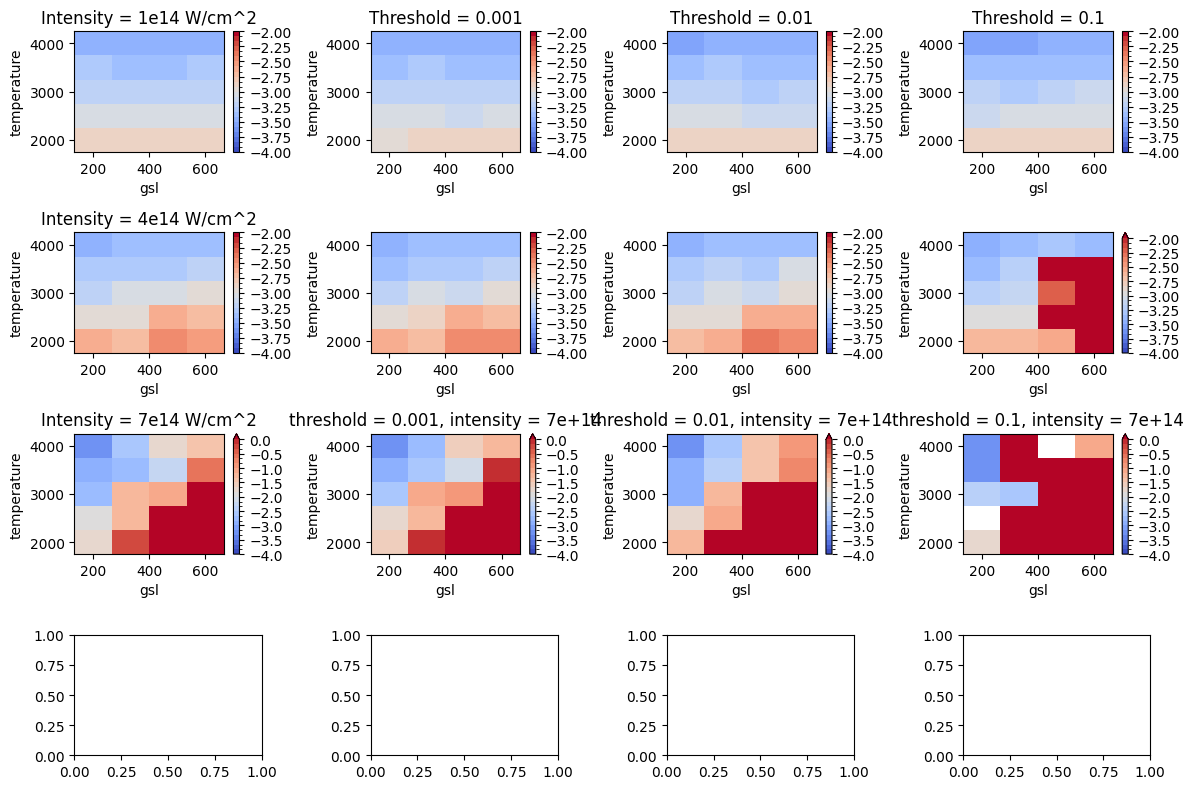

In [3]:
fig, ax = plt.subplots(4, 4, figsize=(12, 8), tight_layout=True)
plot_arr = loss_values.loc[{"intensity": 1e14}]
plot_arr.plot(ax=ax[0, 0], cmap="coolwarm", levels=np.linspace(-4, -2, 25))
ax[0, 0].set_title("Intensity = 1e14 W/cm^2")

plot_arr = cutoff_loss_values.loc[{"intensity": 1e14, "threshold": 0.001}]
plot_arr.plot(ax=ax[0, 1], cmap="coolwarm", levels=np.linspace(-4, -2, 25))
ax[0, 1].set_title("Threshold = 0.001")

plot_arr = cutoff_loss_values.loc[{"intensity": 1e14, "threshold": 0.01}]
plot_arr.plot(ax=ax[0, 2], cmap="coolwarm", levels=np.linspace(-4, -2, 25))
ax[0, 2].set_title("Threshold = 0.01")

plot_arr = cutoff_loss_values.loc[{"intensity": 1e14, "threshold": 0.1}]
plot_arr.plot(ax=ax[0, 3], cmap="coolwarm", levels=np.linspace(-4, -2, 25))
ax[0, 3].set_title("Threshold = 0.1")

plot_arr = loss_values.loc[{"intensity": 4e14}]
plot_arr.plot(ax=ax[1, 0], cmap="coolwarm", levels=np.linspace(-4, -2, 25))
ax[1, 0].set_title("Intensity = 4e14 W/cm^2")

plot_arr = cutoff_loss_values.loc[{"intensity": 4e14, "threshold": 0.001}]
plot_arr.plot(ax=ax[1, 1], cmap="coolwarm", levels=np.linspace(-4, -2, 25))
ax[1, 1].set_title("")

plot_arr = cutoff_loss_values.loc[{"intensity": 4e14, "threshold": 0.01}]
plot_arr.plot(ax=ax[1, 2], cmap="coolwarm", levels=np.linspace(-4, -2, 25))
ax[1, 2].set_title("")

plot_arr = cutoff_loss_values.loc[{"intensity": 4e14, "threshold": 0.1}]
plot_arr.plot(ax=ax[1, 3], cmap="coolwarm", levels=np.linspace(-4, -2, 25))
ax[1, 3].set_title("")

plot_arr = loss_values.loc[{"intensity": 7e14}]
plot_arr.plot(ax=ax[2, 0], cmap="coolwarm", levels=np.linspace(-4, 0, 25))
ax[2, 0].set_title("Intensity = 7e14 W/cm^2")

plot_arr = cutoff_loss_values.loc[{"intensity": 7e14, "threshold": 0.001}]
plot_arr.plot(ax=ax[2, 1], cmap="coolwarm", levels=np.linspace(-4, 0, 25))

plot_arr = cutoff_loss_values.loc[{"intensity": 7e14, "threshold": 0.01}]
plot_arr.plot(ax=ax[2, 2], cmap="coolwarm", levels=np.linspace(-4, 0, 25))

plot_arr = cutoff_loss_values.loc[{"intensity": 7e14, "threshold": 0.1}]
plot_arr.plot(ax=ax[2, 3], cmap="coolwarm", levels=np.linspace(-4, 0, 25))



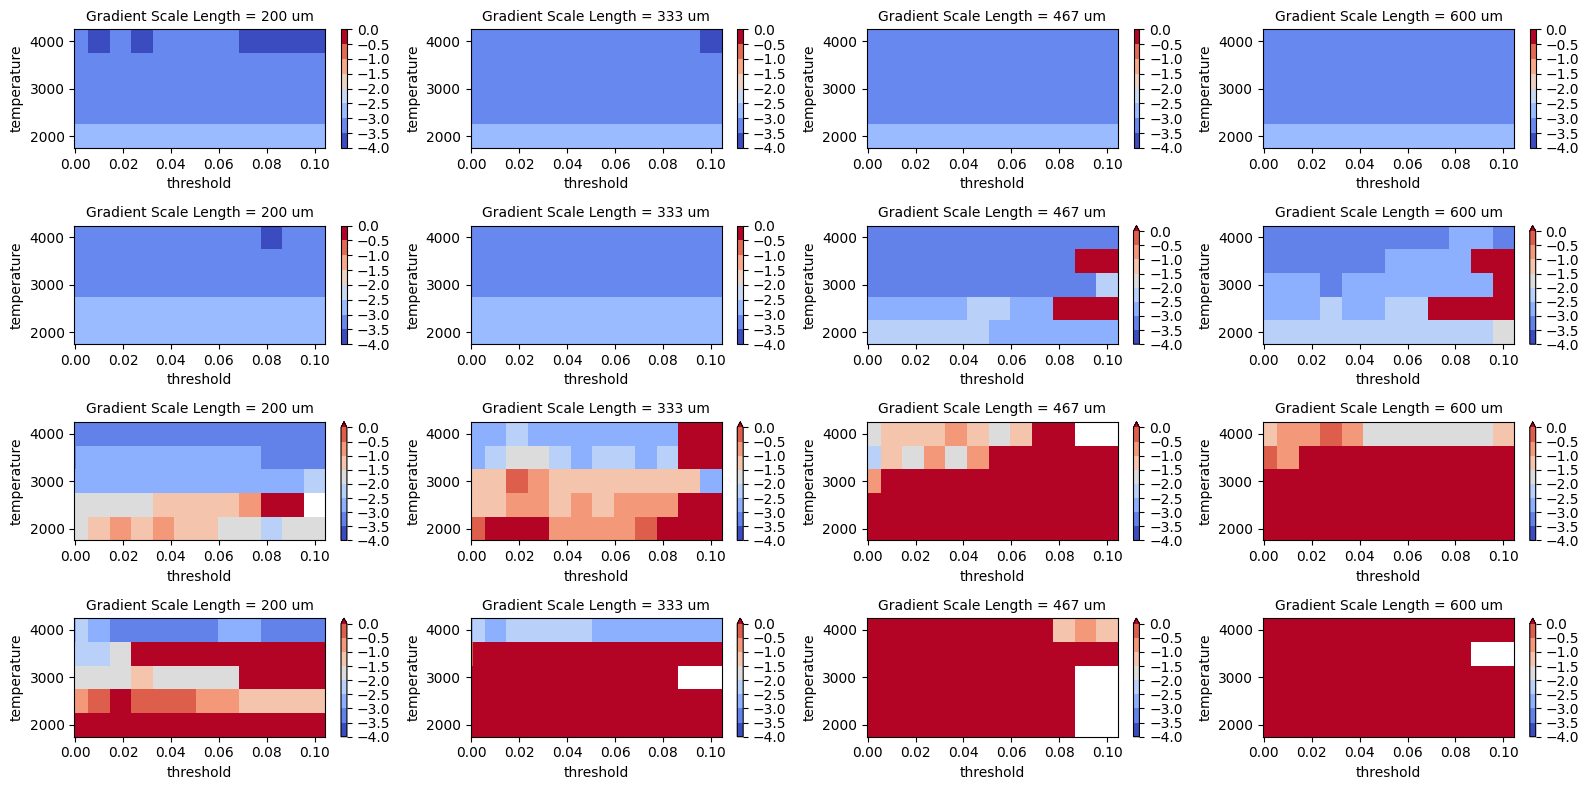

In [7]:
fig, ax = plt.subplots(4, 4, figsize=(16, 8), tight_layout=True)

intensities = loss_values.coords["intensity"].data
gsls = cutoff_loss_values.coords["gsl"].data


for int_ind, intensity in enumerate(intensities):
    for plot_ind, gsl in enumerate(gsls):
        plot_arr = cutoff_loss_values.loc[{"intensity": intensity, "gsl": gsl}]
        plot_arr.plot(ax=ax[int_ind, plot_ind], cmap="coolwarm", levels=np.linspace(-4, 0, 9))
        ax[int_ind, plot_ind].set_title(f"Gradient Scale Length = {gsl:.0f} um", fontsize=10)